![titre](C13.jpg)

## <span style='color:#AC1620'> Explication du programme en langage Python</span>

### <span style='color:#163538'> Activité 2 p 263  : Les lois de Kepler à l'ère du numérique </span>


**Pour faire fonctionner le programme à l'aide de Jupyter Notebook, il faut exécuter les cellules contenant du code les unes après les autres** 

__Remarque__ : cette activité permet de travailler la capacité numérique  "_Exploiter, à l’aide d’un langage de 
programmation, des données astronomiques ou satellitaires pour tester les deuxième et troisième lois de Kepler._"

#### Pour ce chapitre, les programmes sont proposés selon deux dimensions avec une projection des coordonnées ou selon trois dimensions. Nous expliquons ici le programme représentant la trajectoire selon trois dimensions.

La première étape consiste à importer :
* la bibliothèque <span style='color:red' > matplotlib.pyplot </span> avec l'alias *plt*. Elle servira à réaliser le graphique ;
* la bibliothèque <span style='color:red' >numpy </span> avec l'alias _np_. Elle fournira différents éléments mathématiques.
* la bibliothèque <span style='color:red' >pandas </span>. Elle permet de lire des fichiers de type csv tout en prenant en compte les valeurs négatives.
* la bibliothèque <span style='color:red' > mpl_toolkits.mplot3d </span> uniquement dans le fichier proposant un affichage de la trajectoire en 3D. 

Pour obtenir un résultat interactif avec Jupyter-Notebook (uniquement), on ajoute la lecture avec une fenêtre qt à l'aide de la commande ``%matplotlib qt``

In [1]:
%matplotlib qt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Pour calculer l'aire balayée par le segment [planète-Soleil] entre -J et +J autour du périhélie ou de l'aphélie, on propose une fonction **calcul_aire()** qui permet de calculer l'aire de cette surface en émettant l'hypothèse qu'entre J et J+1, l'aire balayée est celle d'un triangle rectangle en J : 
- de hauteur SP, où SP est la distance entre le Soleil et la planète ; 
- de base $v \times \Delta t$.
L'aire balayée entre -J et +J est alors la somme des aires de chacun des triangles. Ce calcul est présenté dans la fonction ``calcul_aire(J,ID_centre)``.

Il est possible de proposer un autre calcul, sans supposer que le triangle est rectangle. L'aire balayée est alors le demi-produit vectoriel des deux vecteurs $\vec{SP}_J $ et $\vec{SP}_{J+1}$. Ce calcul est présenté dans la fonction ``calcul_aire2(J,ID_centre)``.

In [2]:
def calcul_aire(J, ID_centre) :
    '''
    Cette fonction calcule l'aire en faisant le calcul de la surface d'un triangle
    considéré comme rectangle de hauteur (Soleil-Planète) et de base (v(jour)*t)
    '''
    Jour= ID_centre-J
    aire=0
    for j in range (0,2*J) :
        aire= aire+ M[Jour+j]*V[Jour+j]/2
    return(aire)


def calcul_aire2(J,ID_centre) :
    '''
    Cette fonction calcule l'aire en faisant le calcul de la surface d'un triangle
    Soleil-Position J-PositionJ+1 à l'aide du produit vectoriel SP(j)^SP(j+1)
    '''
    Jour= ID_centre-J
    aire=0
    for j in range (0,2*J-1) :
        x,y,z=X[Jour+j], Y[Jour+j], Z[Jour+j]
        x1,y1,z1=X[Jour+j+1], Y[Jour+j+1], Z[Jour+j+1]
        surface_triangle=0.5*np.sqrt((y*z1-z*y1)**2+ (z*x1-x*z1)**2+(x*y1-y*x1)**2)
        aire= aire+ surface_triangle
    return(aire)

On définit également une fonction **trace-parcourue** qui permet de tracer le segment [Soleil-Planète] tout au long du parcours de la planète entre J et +J autour du périhélie ou de l'aphélie.

In [3]:
def trace_parcourue(J,ID_point,couleur) :
    Jour=ID_point - J
    for j in range (0,2*J) :
        ax.plot([0,X[Jour+j]],[0,Y[Jour+j]],[0,Z[Jour+j]],color=couleur, linewidth = 3)
    return()

La partie suivante du programme va utiliser la bibliothèque <span style='color:red' >pandas </span> pour lire les fichiers de type csv mis à disposition. Ces fichiers sont issus de la base de l'IMCCE ( <a href="https://www.imcce.fr/">Site</a> ).

Il est demandé dans un premier temps à l'utilisateur de choisir le nom du fichier mis à disposition.
Le programme liste alors les coordonnées **X**, **Y** et **Z** en unité astronomique de la position de la planète pour chaque jour. Le programme liste également les vitesses **Vx**, **Vy** et **Vz**.

On détermine alors le périhélie qui est le point de la trajectoire où la position de la planète est la plus proche du Soleil (ou de l'astre attracteur).
On détermine de la même manière l' aphélie (position la plus éloignée du Soleil).

In [4]:
fname = input("Saisir le nom du fichier sans l'extension (.csv)")
#Lecture du fichier Mercure.csv
Data = pd.read_csv(fname+'.csv', sep=';', header=0)
#Modification de la ligne date du format objet vers le format datetime
Data['Date (undefined)'] = pd.to_datetime(Data['Date (undefined)'])
#Stocker les variables dans une matrice
# Position
X = Data['x (au)']
Y = Data['y (au)']
Z = Data['z (au)']
M = np.sqrt(X**2+Y**2+Z**2)
# Vitesse
Vx = Data['vx (au/d)']
Vy = Data['vy (au/d)']
Vz = Data['vz (au/d)']
V = np.sqrt(Vx**2+Vy**2+Vz**2)
#Calcul des points à l'aphélie et au périhélie
Perihelie = np.min(M)
Aphelie = np.max(M)
#Recupérer les index des points à l'aphélie et au périhélie
ID_Perihelie = np.where(M==Perihelie)[0][0]
ID_Aphelie = np.where(M==Aphelie)[0][0]

Saisir le nom du fichier sans l'extension (.csv)Terre


On souhaite afficher la trajectoire de la planète. Pour cela, on crée une figure de 15 cm sur 10 cm à l'aide de la commande  ``fig=plt.figure(figsize=(15,10))``
La figure occupe alors une ligne et deux colonnes. On ajoute une sous figure **ax** qui occupera la première colonne (celle de gauche) et sera en projection 3D ``ax = fig.add_subplot(121, projection='3d')``.

Dans la suite du programme : 
* ``ax.plot(X,Y,Z, color='k')`` permet de tracer la trajectoire de l'ensemble des positions **X**, **Y** et **Z** ; 
* on ajoute la légende **A** pour aphélie et **P** pour périhélie à l'aide de la commande ``plt.text()`` ;
* on ajoute un point à l'emplacement du Soleil (ou de l'astre attracteur) à l'aide de la commande ``plt.scatter()``

Ensuite: 
* on indique le nombre de jours **J** pris en compte, puis on fait appel à la fonction **trace_parcourue()** pour tracer le segment [Soleil-Planète] entre -J et +J autour de l'aphélie ou du périhélie.

Enfin: 
* on ajoute une grille ``plt.grid(True)`` ; 
* on ajoute les légendes des axes ``ax.set_ylabel`` (pour l'axe $y$ par exemple ici)
* on ajoute enfin un titre à l'aide de la commande ``plt.title``

Pour exploiter la troisième loi de Kepler, on calcule : 
* le demi-grand axe $a$ : $a=\frac{\displaystyle [SP]_{perihelie}+ [SP]_{aphelie}}{\displaystyle 2}$. Cette distance est exprimée en unité astronomique ;  
* la période $T$ de révolution de la planète : pour cela, on recherche les dates pour lesquelles, la position de la planète redevient identique.
* on convertit cette durée en secondes.

Dans la fin du programme on créé une seconde sous-figure **ax1** qui occupera la seconde colonne puis : 
* les limites de la figure à l'aide des commandes ``plt.xlim()`` et ``plt.ylim()``
* les commandes ``plt.xticks([])`` et ``plt.yticks([])`` permettent de supprimer les graduations ; 
* on ajoute alors pour le point **P** et le point **A** : 
    * La distance **M** à l'astre attracteur ; 
    * la valeur de la  vitesse **V** ; 
    * L'aire de la surface balayée  ; 

Enfin, pour exploiter la troisième loi de Kepler, on indique : 
* le demi-grand axe $a$ en ua ; 
* la période $T$ en seconde ; 

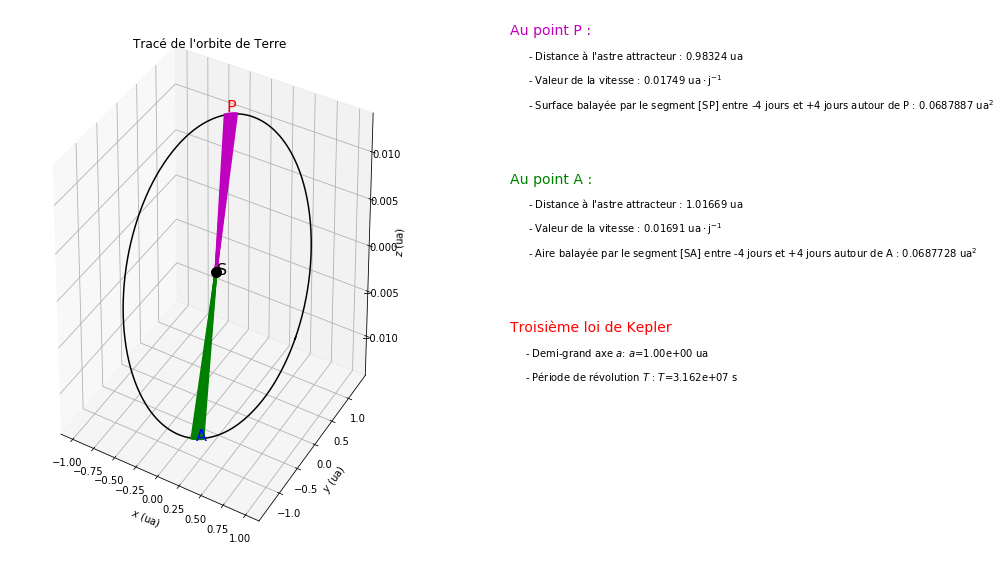

In [6]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(121, projection='3d')
#Tracer l'ellipse et ajout des légendes
ax.plot(X,Y,Z, color='k')
ax.text(X[ID_Aphelie]-0.01,Y[ID_Aphelie]-0.05,Z[ID_Aphelie],"A",fontsize = 16,color='b')
ax.text(X[ID_Perihelie]-0.05,Y[ID_Perihelie]+0.005,Z[ID_Perihelie],"P",fontsize = 16,color='r')
ax.scatter(0,0,0,color='k', s=100)
ax.text(0.03,-0.03,0,'S', fontsize = 16)

## Tracer les différentes zones balayées
J=4
trace_parcourue(J,ID_Perihelie,'m')
trace_parcourue(J,ID_Aphelie,'g')

#Paramètres figure
ax.axis('equal')
plt.grid(True)

#Légendes
plt.title("Tracé de l'orbite de " + str(fname))
ax.set_ylabel(r'$y$ (ua)')
ax.set_xlabel('$x$ (ua)')
ax.set_zlabel('$z$ (ua)')
###############################################################
#Troisième loi de Kepler
###############################################################
#Calcul du demi-grand axe
a=((M[ID_Aphelie]+M[ID_Perihelie])/2)
#Calcul de la période
ID_same = np.where(round(M[1:],3)==round(M[0],3))[0][-1]
T = Data['Date (undefined)'][ID_same+1] - Data['Date (undefined)'][0]
Ts = T.days*24*3600

ax1=fig.add_subplot(122,frameon=False)
plt.xlim(0,13)
plt.ylim(0,11)
plt.xticks([])
plt.yticks([])
ax1.text(0.5,10.5,"Au point P : ", color='m', fontsize=14)
ax1.text(1.,10," - Distance à l'astre attracteur : "+str(round(M[ID_Perihelie],5))+ " $\mathrm{ua}$")
ax1.text(1.,9.5," - Valeur de la vitesse : "+str(round(V[ID_Perihelie],5))+ " $\mathrm{ua\cdot j^{-1}}$")
ax1.text(1.,9," - Surface balayée par le segment [SP] entre "+ str(-J) +" jours et +" + str(+J) + " jours autour de P : "+str(round(calcul_aire(J,ID_Perihelie),7))+ " $\mathrm{ua^2}$")

ax1.text(0.5,7.5,"Au point A : ", color='g', fontsize=14)
ax1.text(1.,7," - Distance à l'astre attracteur : "+str(round(M[ID_Aphelie],5))+ " $\mathrm{ua}$")
ax1.text(1.,6.5," - Valeur de la vitesse : "+str(round(V[ID_Aphelie],5))+ " $\mathrm{ua\cdot j^{-1}}$")
ax1.text(1.,6," - Aire balayée par le segment [SA] entre "+ str(-J) +" jours et +" + str(+J) + " jours autour de A : "+str(round(calcul_aire(J,ID_Aphelie),7))+ " $\mathrm{ua^2}$")
plt.savefig('Kepler_'+(fname)+'.png')

ax1.text(0.5,4.5,"Troisième loi de Kepler ", color='r', fontsize=14)
ax1.text(1,4,"- Demi-grand axe $a$: "+'$a$=%.2e'%(a)+" ua")
ax1.text(1,3.5,"- Période de révolution $T$ : "+'$T$=%.3e'%(Ts)+" s")
plt.show()